# AI DAM Data Preperation

***This notebook calculate structural similarity index between the two input images to find the duplicate inages in the dataset.
it create the output file with name: dam_duplicate_list.csv***

file contains following attribute to tag the duplicate images:
1. ssim_score: structural similarity index of image if this image is duplicate of any other inage in the dataset for same drive and same class
2. duplicate: 1: mean duplicate, 0: mean unique
it is set to 1 only when ssim_score of that image is above 0.80 
3. parent_img: contain the reference of the image with whon its ssim_score is above 0.80.. this image is duplicate of the parent_img                            

In [1]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import time
import os
#from tqdm import tqdm # for progress indication

In [2]:
# print(os.listdir("../input")) # for kernal

**Read the images and generate the train and test dataset**

In [3]:
class_list =  ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
class_desc = ['safe driving', 'texting-right', 'talking on the phone-right', 'texting-left', 'talking on the phone-left', 
              'operating the radio', 'rinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
pd.DataFrame({'class': class_list, 'description': class_desc})

,class,description
0,c0,safe driving
1,c1,texting-right
2,c2,talking on the phone-right
3,c3,texting-left
4,c4,talking on the phone-left
5,c5,operating the radio
6,c6,rinking
7,c7,reaching behind
8,c8,hair and makeup
9,c9,talking to passenger


In [4]:
data_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs/'
#data_dir = '../input/imgsleft/imgs_left'   # For kernal

train_dir = os.path.join(data_dir, 'train')

In [5]:
for classname in class_list:
    print('{}: {} images'.format(classname, len(os.listdir(os.path.join(train_dir, classname)))))

c0: 2489 images
c1: 2267 images
c2: 2317 images
c3: 2346 images
c4: 2326 images
c5: 2312 images
c6: 2325 images
c7: 2002 images
c8: 1911 images
c9: 2129 images


In [6]:
df_driver = pd.read_csv("driver_imgs_list.csv")
#df_driver = pd.read_csv("../input/driver-imgs-list/driver_imgs_list.csv") # for kernal
print("Shape: ", df_driver.shape)
df_driver.head(2)

Shape:  (22424, 3)


,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg


In [7]:
df_driver["duplicate"] = 0 # by default set as no duplicate images
df_driver["parent_img"] = "" # by default set as no duplicate images, valid when duplicate = 1
df_driver["ssim_score"] = 0.0

print("Shape: ", df_driver.shape)
df_driver.head(2)

Shape:  (22424, 6)


,subject,classname,img,duplicate,parent_img,ssim_score
0,p002,c0,img_44733.jpg,0,,0.0
1,p002,c0,img_72999.jpg,0,,0.0


In [8]:
df_driver.dtypes

subject        object
classname      object
img            object
duplicate       int64
parent_img     object
ssim_score    float64
dtype: object

In [9]:
len(df_driver["img"].unique()) # this check whether there is no duplicate file name across dataset

22424

In [10]:
driver_list = df_driver["subject"].unique()
class_id_list = df_driver["classname"].unique()
print("Number of unique drivers: ", len(driver_list))
print("Number of class: ", len(class_id_list))

Number of unique drivers:  26
Number of class:  10


In [11]:
df_driver["subject"].value_counts()

p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p081     823
p012     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: subject, dtype: int64

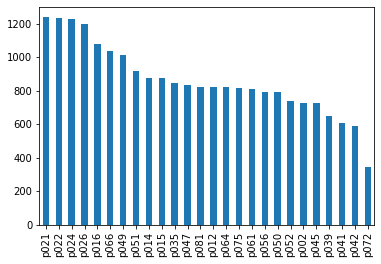

In [12]:
df_driver["subject"].value_counts().plot(kind="bar")

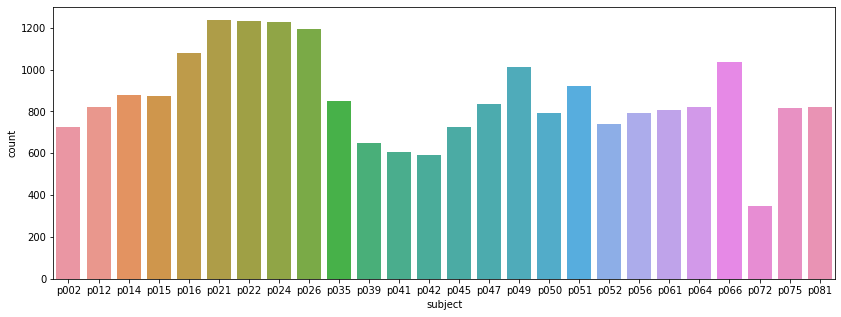

In [13]:
#plotting how the classes are distributed
fig, axs = plt.subplots(1,1,figsize=(14,5))
sns.countplot(df_driver["subject"], ax = axs)

In [14]:
##CrossTable
df_class_driver = pd.crosstab(df_driver["classname"], df_driver["subject"],margins =True)

In [15]:
df_class_driver.T

classname,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,All
subject,,,,,,,,,,,
p002,76,74,86,79,84,76,83,72,44,51,725
p012,84,95,91,89,97,96,75,72,62,62,823
p014,100,103,100,100,103,102,101,77,38,52,876
p015,79,85,88,94,101,101,99,81,86,61,875
p016,111,102,101,128,104,104,108,101,99,120,1078
p021,135,131,127,128,132,130,126,98,99,131,1237
p022,129,129,128,129,130,130,131,98,98,131,1233
p024,130,129,128,130,129,131,129,101,99,120,1226
p026,130,129,130,131,126,130,128,97,97,98,1196


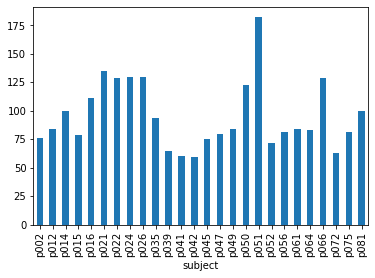

In [16]:
df_class_driver.T["c0"][:-1].plot(kind="bar")

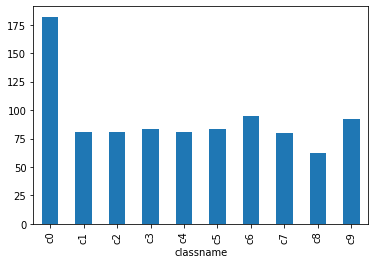

In [17]:
df_class_driver["p051"][:-1].plot(kind="bar")

In [18]:
for c in class_id_list:
    df_class = df_driver[df_driver["classname"] == c]
    classdriver_list = df_class["subject"].unique()
    print("Number of unique drivers in class {}: {}".format(c, len(classdriver_list)))

Number of unique drivers in class c0: 26
Number of unique drivers in class c1: 26
Number of unique drivers in class c2: 26
Number of unique drivers in class c3: 26
Number of unique drivers in class c4: 26
Number of unique drivers in class c5: 26
Number of unique drivers in class c6: 26
Number of unique drivers in class c7: 26
Number of unique drivers in class c8: 26
Number of unique drivers in class c9: 26


In [19]:
CNT_PER_DRIVER_LIST = []
for c in class_id_list:
    df_class = df_driver[df_driver["classname"] == c]
    class_drivers_list = df_class["subject"].unique()
    for d in class_drivers_list:
        df_class_driver = df_class[df_class["subject"] == d]     
        #print("class: {}, driver:{}, count:{}".format(c,d, df_class_driver.shape[0]))
        CNT_PER_DRIVER_LIST.append(df_class_driver.shape[0])

In [20]:
MAX_NUM_IMGS_PER_DRIVER = np.max(CNT_PER_DRIVER_LIST)
MIN_NUM_IMGS_PER_DRIVER = np.min(CNT_PER_DRIVER_LIST)
print("MIN_NUM_IMGS_PER_DRIVER: ", MIN_NUM_IMGS_PER_DRIVER)
print("MAX_NUM_IMGS_PER_DRIVER: ", MAX_NUM_IMGS_PER_DRIVER)

MIN_NUM_IMGS_PER_DRIVER:  2
MAX_NUM_IMGS_PER_DRIVER:  182


***The score***  represents the structural similarity index between the two input images.
This value can fall into the range [-1, 1] with a value of one being a “perfect match.

***The diff image*** contains the actual image differences between the two input images that we wish to visualize. 
The difference image is currently represented as a floating point data type in the range [0, 1] 
so we first convert the array to 8-bit unsigned integers in the range [0, 255] (Line 26) before 
we can further process it using OpenCV.

In [21]:
from skimage.measure import compare_ssim
import imutils
import cv2

def test_compare_image_data_ssim(file1, file2):
    score = np.random.rand(1)
    diff = 1
    return score[0], diff

def read_img(filename):
    # load the two input images
    img = cv2.imread(filename)
 
    # convert the images to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    return gray

def compare_image_ssim(file1, file2):
    # load the two input images
    imageA = cv2.imread(file1)
    imageB = cv2.imread(file2)

    # convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    #print("SSIM: {}".format(score))
    return score, diff

def compare_image_data_ssim(grey_imgdataA, grey_imgdataB):
    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grey_imgdataA, grey_imgdataB, full=True)
    diff = (diff * 255).astype("uint8")
    #print("SSIM: {}".format(score))
    return score, diff

In [22]:
classDupCnt = 0
SSIM_THRESHOLD = 0.80

def process_class_data(df_data, classname, thresh):
    classDupCnt = 0
    print("Processing class {}".format(classname))
    df_class = df_data[df_data["classname"] == c]
    class_drivers_list = df_class["subject"].unique()
    for d in class_drivers_list:
        dvalues = df_class[df_class["subject"] == d].values
        curIndexList = np.arange(len(dvalues)) # this list will be updated for each iteration if duplictae is fine
        #print(len(dvalues))
        print("Processing class:{}, driver: {}, driver count: {}".format(c,d, len(dvalues)))
        dupList = [] # list index for duplicate images
        driverProcessCnt = 0    
        greyDataList = []
        
        # pre-load all the image data, this save both memory and loading time
        for idx, item in enumerate(dvalues):
            imgName = dvalues[idx][2]
            imgfile = '{}/{}/{}'.format(train_dir, c, imgName)       
            img_grey = read_img(imgfile)
            greyDataList.append(img_grey)
            
            
        for idx, item in enumerate(dvalues):
            if(idx not in dupList):
                imgName1 = dvalues[idx][2]
                #imgfile1 = '{}/{}/{}'.format(train_dir, c, imgName1)       
                #img_grey1 = read_img(imgfile1)
                #print("{}-{}".format(item,idx))            
                for nextidx in np.arange(idx+1, len(dvalues)):
                    if(nextidx not in dupList): 
                        driverProcessCnt += 1
                        imgName2 = dvalues[nextidx][2]
                        #imgfile2 = '{}/{}/{}'.format(train_dir, c, imgName2)
                        #img_grey2 = read_img(imgfile2)
                        #print("Processing class:{}, driver: {}, {}-{}".format(c,d, imgName1, imgName2))
                        #print("Processing class:{}, driver: {}, {}-{}".format(c,d, imgfile1, imgfile2))
                        score, diff = compare_image_data_ssim(greyDataList[idx], greyDataList[nextidx])
                        #print("Processing class:{}, driver: {}, {}-{}, score: {}".format(c,d, imgName1, imgName2, score))
                        if(score > thresh):
                            classDupCnt += 1
                            dupList.append(nextidx)
                            # update df: mark duplicate in df
                            # update df: put dvalues[idx][2] against dvalues[nextidx][2] as records
                            df_data.loc[df_driver.img == imgName2, 'duplicate'] = 1
                            df_data.loc[df_driver.img == imgName2, 'parent_img'] = imgName1
                            df_data.loc[df_driver.img == imgName2, 'ssim_score'] = float(format(score,".4f"))
                            
                        del diff
                            
        print("==>Processed: class:{}, driver: {}, comparison cnt: {}".format(c,d, driverProcessCnt))
        del greyDataList
        
    out_filename = "dam_{}_duplicate_list.csv".format(classname)
    df_data.to_csv(out_filename)
    print("==>class:{}, duplicate count: {}".format(classname, classDupCnt))

# fxn without pre image load.. expensive fxn .. just for backup
def process_class_data_old(df_data, classname, thresh):
    classDupCnt = 0
    print("Processing class {}".format(classname))
    df_class = df_data[df_data["classname"] == c]
    class_drivers_list = df_class["subject"].unique()
    for d in class_drivers_list:
        dvalues = df_class[df_class["subject"] == d].values
        curIndexList = np.arange(len(dvalues)) # this list will be updated for each iteration if duplictae is fine
        #print(len(dvalues))
        print("Processing class:{}, driver: {}, driver count: {}".format(c,d, len(dvalues)))
        dupList = [] # list index for duplicate images
        driverProcessCnt = 0
        for idx, item in enumerate(dvalues):
            if(idx not in dupList):
                imgName1 = dvalues[idx][2]
                imgfile1 = '{}/{}/{}'.format(train_dir, c, imgName1)         
                #print("{}-{}".format(item,idx))            
                for nextidx in np.arange(idx+1, len(dvalues)):
                    if(nextidx not in dupList): 
                        driverProcessCnt += 1
                        imgName2 = dvalues[nextidx][2]
                        imgfile2 = '{}/{}/{}'.format(train_dir, c, imgName2)
                        #print("Processing class:{}, driver: {}, {}-{}".format(c,d, imgName1, imgName2))
                       # print("Processing class:{}, driver: {}, {}-{}".format(c,d, imgfile1, imgfile2))
                        score, diff = test_compare_image_ssim(imgfile1, imgfile2)
                        #print("Processing class:{}, driver: {}, {}-{}, score: {}".format(c,d, imgName1, imgName2, score))
                        if(score > thresh):
                            classDupCnt += 1
                            dupList.append(nextidx)
                            # update df: mark duplicate in df
                            # update df: put dvalues[idx][2] against dvalues[nextidx][2] as records
                            df_data.loc[df_driver.img == imgName2, 'duplicate'] = 1
                            df_data.loc[df_driver.img == imgName2, 'parent_img'] = imgName1
                            df_data.loc[df_driver.img == imgName2, 'ssim_score'] = float(format(score,".4f"))
        print("==>Processed: class:{}, driver: {}, comparison cnt: {}".format(c,d, driverProcessCnt))
    out_filename = "dam_{}_duplicate_list.csv".format(classname)
    df_data.to_csv(out_filename)
    print("==>class:{}, duplicate count: {}".format(classname, classDupCnt))

In [23]:
SSIM_THRESHOLD = 0.80

reverse_class_id_list = list(reversed(class_id_list))

for c in reverse_class_id_list:
    process_class_data(df_driver,c,SSIM_THRESHOLD)

print("==========Processing completed==========")
print("==========Saving calculated ssim score into output file==========")
df_driver.to_csv("dam_duplicate_list.csv")

Processing class c9
Processing class:c9, driver: p002, driver count: 51
==>Processed: class:c9, driver: p002, comparison cnt: 315
Processing class:c9, driver: p012, driver count: 62
==>Processed: class:c9, driver: p012, comparison cnt: 1768
Processing class:c9, driver: p014, driver count: 52
==>Processed: class:c9, driver: p014, comparison cnt: 737
Processing class:c9, driver: p015, driver count: 61
==>Processed: class:c9, driver: p015, comparison cnt: 1797
Processing class:c9, driver: p016, driver count: 120
==>Processed: class:c9, driver: p016, comparison cnt: 991
Processing class:c9, driver: p021, driver count: 131
==>Processed: class:c9, driver: p021, comparison cnt: 7399
Processing class:c9, driver: p022, driver count: 131
==>Processed: class:c9, driver: p022, comparison cnt: 5782
Processing class:c9, driver: p024, driver count: 120
==>Processed: class:c9, driver: p024, comparison cnt: 4565
Processing class:c9, driver: p026, driver count: 98
==>Processed: class:c9, driver: p026, c

==>Processed: class:c7, driver: p064, comparison cnt: 1221
Processing class:c7, driver: p066, driver count: 86
==>Processed: class:c7, driver: p066, comparison cnt: 3126
Processing class:c7, driver: p072, driver count: 2
==>Processed: class:c7, driver: p072, comparison cnt: 1
Processing class:c7, driver: p075, driver count: 82
==>Processed: class:c7, driver: p075, comparison cnt: 3297
Processing class:c7, driver: p081, driver count: 77
==>Processed: class:c7, driver: p081, comparison cnt: 2680
==>class:c7, duplicate count: 367
Processing class c6
Processing class:c6, driver: p002, driver count: 83
==>Processed: class:c6, driver: p002, comparison cnt: 1177
Processing class:c6, driver: p012, driver count: 75
==>Processed: class:c6, driver: p012, comparison cnt: 1602
Processing class:c6, driver: p014, driver count: 101
==>Processed: class:c6, driver: p014, comparison cnt: 1082
Processing class:c6, driver: p015, driver count: 99
==>Processed: class:c6, driver: p015, comparison cnt: 3532
Pr

==>Processed: class:c4, driver: p050, comparison cnt: 675
Processing class:c4, driver: p051, driver count: 81
==>Processed: class:c4, driver: p051, comparison cnt: 675
Processing class:c4, driver: p052, driver count: 72
==>Processed: class:c4, driver: p052, comparison cnt: 2017
Processing class:c4, driver: p056, driver count: 82
==>Processed: class:c4, driver: p056, comparison cnt: 2042
Processing class:c4, driver: p061, driver count: 79
==>Processed: class:c4, driver: p061, comparison cnt: 905
Processing class:c4, driver: p064, driver count: 86
==>Processed: class:c4, driver: p064, comparison cnt: 652
Processing class:c4, driver: p066, driver count: 102
==>Processed: class:c4, driver: p066, comparison cnt: 1330
Processing class:c4, driver: p072, driver count: 34
==>Processed: class:c4, driver: p072, comparison cnt: 423
Processing class:c4, driver: p075, driver count: 89
==>Processed: class:c4, driver: p075, comparison cnt: 2961
Processing class:c4, driver: p081, driver count: 77
==>Pr

==>Processed: class:c1, driver: p041, comparison cnt: 685
Processing class:c1, driver: p042, driver count: 59
==>Processed: class:c1, driver: p042, comparison cnt: 598
Processing class:c1, driver: p045, driver count: 75
==>Processed: class:c1, driver: p045, comparison cnt: 1595
Processing class:c1, driver: p047, driver count: 91
==>Processed: class:c1, driver: p047, comparison cnt: 768
Processing class:c1, driver: p049, driver count: 85
==>Processed: class:c1, driver: p049, comparison cnt: 454
Processing class:c1, driver: p050, driver count: 45
==>Processed: class:c1, driver: p050, comparison cnt: 222
Processing class:c1, driver: p051, driver count: 81
==>Processed: class:c1, driver: p051, comparison cnt: 871
Processing class:c1, driver: p052, driver count: 71
==>Processed: class:c1, driver: p052, comparison cnt: 1198
Processing class:c1, driver: p056, driver count: 80
==>Processed: class:c1, driver: p056, comparison cnt: 498
Processing class:c1, driver: p061, driver count: 81
==>Proce

In [ ]:
df_driver["duplicate"].value_counts()

In [ ]:
df_driver.head()

In [ ]:
df_driver[df_driver["ssim_score"] > 0.9].head()

In [ ]:
df_driver.parent_img.value_counts()

***Vusualizing image differences**

In [ ]:
# to visualize the image difference
classname = "c9"
imgName1 = img_31757.jpg
imgName2 = img_60621.jpg

img1 = '{}/{}/{}'.format(train_dir, classname, imgName1)    
img2 = '{}/{}/{}'.format(train_dir, classname, imgName2)    

In [ ]:
def plot_images(fimg1,fimg2):
    (score, diff) = compare_image_ssim(fimg1,fimg2)
    print("SSIM: {}".format(score))
    
    # load the two input images
    imageA = cv2.imread(fimg1)
    imageB = cv2.imread(fimg2)

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # loop over the contours
    for c in cnts:
        # compute the bounding box of the contour and then draw the
        # bounding box on both input images to represent where the two
        # images differ
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # show the output images
    fig, axs = plt.subplots(2,2,figsize=(10,10))

    label = 'image1'
    axs[0][0].imshow(imageA)
    axs[0][0].set_title(label)

    label = 'image2'
    axs[0][1].imshow(imageB)
    axs[0][1].set_title(label)

    label = 'diff'
    axs[1][0].imshow(diff)
    axs[1][0].set_title(label)

    label = 'threshold'
    axs[1][1].imshow(thresh)
    axs[1][1].set_title(label)

    plt.show()

In [ ]:
(score, diff) = compare_image_ssim(img1,img2)
print("SSIM: {}".format(score))

In [ ]:
 plot_images(img1,img2)

**basic image dirrefence using substract**

In [ ]:
# load the two input images
imageA = cv2.imread(img1)
imageB = cv2.imread(img2)

difference = cv2.subtract(imageA, imageB)
b, g, r = cv2.split(difference)

if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("The images are completely Equal")

plt.imshow(difference)